In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from datetime import datetime

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
data = pd.read_excel("kc_house_data.xlsx")

In [3]:
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,20141013,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,20141209,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,20150225,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,20141209,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,20150218,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521,360000,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509
21609,20150223,400000,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200
21610,20140623,402101,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007
21611,20150116,400000,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287


In [4]:
data.duplicated().sum()

0

In [5]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
data["date"] = data["date"].astype(str)

In [7]:
for x in range(len(data["date"])):
    new = data["date"][x][:4] + "-" + data["date"][x][4:6] + "-" + data["date"][x][6:]
    data["date"][x] = new

In [8]:
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,2014-12-09,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,2015-02-25,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,2014-12-09,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,2015-02-18,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2014-05-21,360000,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509
21609,2015-02-23,400000,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200
21610,2014-06-23,402101,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007
21611,2015-01-16,400000,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287


In [9]:
data["date"] = pd.to_datetime(data["date"], format = "%Y-%m-%d")

In [10]:
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,2014-12-09,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,2015-02-25,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,2014-12-09,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,2015-02-18,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2014-05-21,360000,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509
21609,2015-02-23,400000,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200
21610,2014-06-23,402101,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007
21611,2015-01-16,400000,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287


In [11]:
for x in range(len(data["long"])):
    data["long"] = data["long"][x] * -1

In [12]:
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,122.257,1340,5650
1,2014-12-09,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,122.257,1690,7639
2,2015-02-25,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,122.257,2720,8062
3,2014-12-09,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,122.257,1360,5000
4,2015-02-18,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,122.257,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2014-05-21,360000,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,122.257,1530,1509
21609,2015-02-23,400000,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,122.257,1830,7200
21610,2014-06-23,402101,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,122.257,1020,2007
21611,2015-01-16,400000,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,122.257,1410,1287


In [13]:
data["year"] = data["date"].dt.year
data["month"] = data["date"].dt.month
data["day"] = data["date"].dt.day

In [14]:
data = data.drop(["date"], axis = 1)

In [15]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month,day
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,47.5112,122.257,1340,5650,2014,10,13
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,47.7210,122.257,1690,7639,2014,12,9
2,180000,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,47.7379,122.257,2720,8062,2015,2,25
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,47.5208,122.257,1360,5000,2014,12,9
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,47.6168,122.257,1800,7503,2015,2,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000,3,2.50,1530,1131,3.0,0,0,3,8,...,0,2009,0,47.6993,122.257,1530,1509,2014,5,21
21609,400000,4,2.50,2310,5813,2.0,0,0,3,8,...,0,2014,0,47.5107,122.257,1830,7200,2015,2,23
21610,402101,2,0.75,1020,1350,2.0,0,0,3,7,...,0,2009,0,47.5944,122.257,1020,2007,2014,6,23
21611,400000,3,2.50,1600,2388,2.0,0,0,3,8,...,0,2004,0,47.5345,122.257,1410,1287,2015,1,16


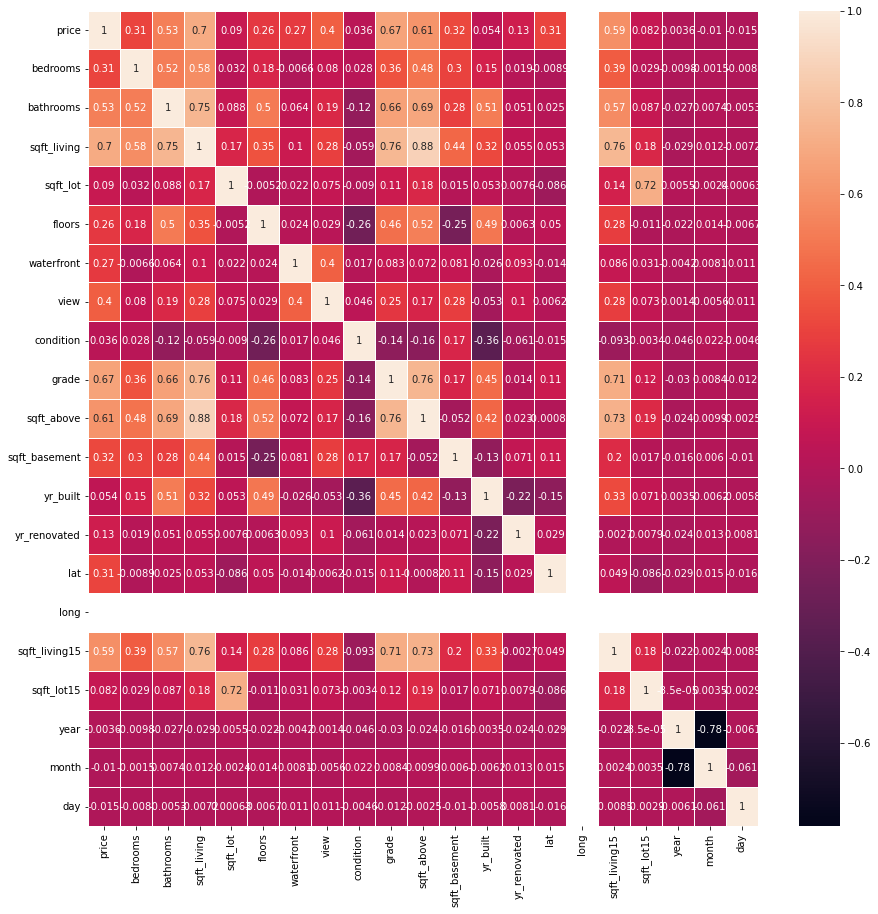

In [16]:
corrMatrix = data.corr()
fig, ax = plt.subplots(figsize = (15, 15))
sn.heatmap(corrMatrix, annot = True, linewidths = .5, ax = ax)
plt.show();

In [17]:
data = data.drop(["sqft_above"], axis = 1)

In [18]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month,day
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,0,1955,0,47.5112,122.257,1340,5650,2014,10,13
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,400,1951,1991,47.7210,122.257,1690,7639,2014,12,9
2,180000,2,1.00,770,10000,1.0,0,0,3,6,0,1933,0,47.7379,122.257,2720,8062,2015,2,25
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,910,1965,0,47.5208,122.257,1360,5000,2014,12,9
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,0,1987,0,47.6168,122.257,1800,7503,2015,2,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000,3,2.50,1530,1131,3.0,0,0,3,8,0,2009,0,47.6993,122.257,1530,1509,2014,5,21
21609,400000,4,2.50,2310,5813,2.0,0,0,3,8,0,2014,0,47.5107,122.257,1830,7200,2015,2,23
21610,402101,2,0.75,1020,1350,2.0,0,0,3,7,0,2009,0,47.5944,122.257,1020,2007,2014,6,23
21611,400000,3,2.50,1600,2388,2.0,0,0,3,8,0,2004,0,47.5345,122.257,1410,1287,2015,1,16


In [19]:
data["condition"].value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

In [20]:
data["grade"].value_counts()

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

In [21]:
data["yr_renovated"].value_counts()

0       20699
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [22]:
data["waterfront"].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

In [23]:
data["view"].value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

In [24]:
data = data.drop(["yr_renovated"], axis = 1)

In [25]:
data = data.drop(["waterfront"], axis = 1)

In [26]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,year,month,day
0,221900,3,1.00,1180,5650,1.0,0,3,7,0,1955,47.5112,122.257,1340,5650,2014,10,13
1,538000,3,2.25,2570,7242,2.0,0,3,7,400,1951,47.7210,122.257,1690,7639,2014,12,9
2,180000,2,1.00,770,10000,1.0,0,3,6,0,1933,47.7379,122.257,2720,8062,2015,2,25
3,604000,4,3.00,1960,5000,1.0,0,5,7,910,1965,47.5208,122.257,1360,5000,2014,12,9
4,510000,3,2.00,1680,8080,1.0,0,3,8,0,1987,47.6168,122.257,1800,7503,2015,2,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000,3,2.50,1530,1131,3.0,0,3,8,0,2009,47.6993,122.257,1530,1509,2014,5,21
21609,400000,4,2.50,2310,5813,2.0,0,3,8,0,2014,47.5107,122.257,1830,7200,2015,2,23
21610,402101,2,0.75,1020,1350,2.0,0,3,7,0,2009,47.5944,122.257,1020,2007,2014,6,23
21611,400000,3,2.50,1600,2388,2.0,0,3,8,0,2004,47.5345,122.257,1410,1287,2015,1,16


<AxesSubplot:xlabel='price', ylabel='Density'>

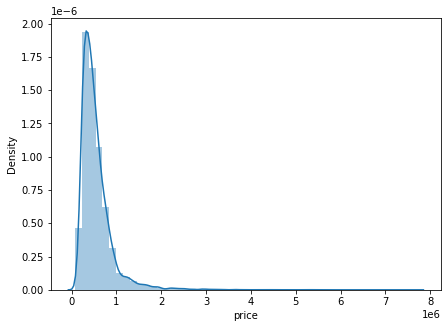

In [27]:
plt.figure(figsize = (7,5))
sn.distplot(data["price"])

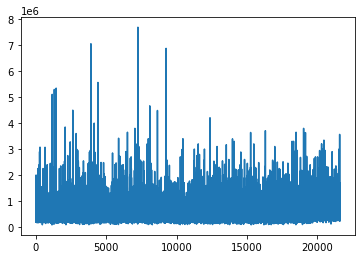

In [28]:
plt.plot([x for x in range(len(data))],data["price"])

In [29]:
data=data.sort_values("price",ascending=False).iloc[500:]

<AxesSubplot:xlabel='price', ylabel='Density'>

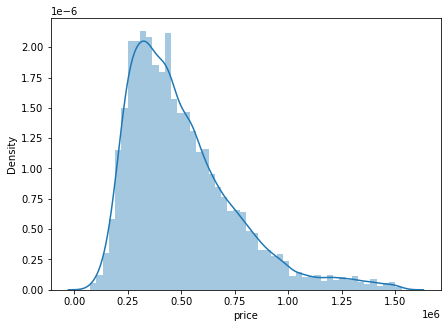

In [30]:
plt.figure(figsize=(7,5))
sn.distplot(data["price"])

In [31]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,year,month,day
8862,1530000,4,2.25,4250,16940,1.0,2,4,9,1870,1974,47.5453,122.257,3460,17693,2014,9,18
1835,1525000,4,3.25,3620,5131,2.0,3,4,11,1270,1927,47.6499,122.257,2550,5174,2014,6,19
5850,1525000,4,4.25,4720,21000,3.0,4,5,11,0,1971,47.7591,122.257,3010,20000,2015,4,2
7346,1525000,4,3.75,5850,35070,2.0,0,4,12,1440,1990,47.5485,122.257,4830,36200,2015,2,10
5059,1525000,4,3.50,5990,111078,2.0,0,3,11,0,2004,47.6670,122.257,4690,118918,2014,8,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8274,82000,3,1.00,860,10426,1.0,0,3,6,0,1954,47.4987,122.257,1140,11250,2014,11,5
16198,81000,2,1.00,730,9975,1.0,0,1,5,0,1943,47.4808,122.257,860,9000,2015,3,24
465,80000,1,0.75,430,5050,1.0,0,2,4,0,1912,47.6499,122.257,1200,7500,2014,5,23
15293,78000,2,1.00,780,16344,1.0,0,1,5,0,1942,47.4739,122.257,1700,10387,2014,5,6


In [32]:
from sklearn import preprocessing

In [33]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,year,month,day
8862,1530000,4,2.25,4250,16940,1.0,2,4,9,1870,1974,47.5453,122.257,3460,17693,2014,9,18
1835,1525000,4,3.25,3620,5131,2.0,3,4,11,1270,1927,47.6499,122.257,2550,5174,2014,6,19
5850,1525000,4,4.25,4720,21000,3.0,4,5,11,0,1971,47.7591,122.257,3010,20000,2015,4,2
7346,1525000,4,3.75,5850,35070,2.0,0,4,12,1440,1990,47.5485,122.257,4830,36200,2015,2,10
5059,1525000,4,3.50,5990,111078,2.0,0,3,11,0,2004,47.6670,122.257,4690,118918,2014,8,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8274,82000,3,1.00,860,10426,1.0,0,3,6,0,1954,47.4987,122.257,1140,11250,2014,11,5
16198,81000,2,1.00,730,9975,1.0,0,1,5,0,1943,47.4808,122.257,860,9000,2015,3,24
465,80000,1,0.75,430,5050,1.0,0,2,4,0,1912,47.6499,122.257,1200,7500,2014,5,23
15293,78000,2,1.00,780,16344,1.0,0,1,5,0,1942,47.4739,122.257,1700,10387,2014,5,6


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21113 entries, 8862 to 1149
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21113 non-null  int64  
 1   bedrooms       21113 non-null  int64  
 2   bathrooms      21113 non-null  float64
 3   sqft_living    21113 non-null  int64  
 4   sqft_lot       21113 non-null  int64  
 5   floors         21113 non-null  float64
 6   view           21113 non-null  int64  
 7   condition      21113 non-null  int64  
 8   grade          21113 non-null  int64  
 9   sqft_basement  21113 non-null  int64  
 10  yr_built       21113 non-null  int64  
 11  lat            21113 non-null  float64
 12  long           21113 non-null  float64
 13  sqft_living15  21113 non-null  int64  
 14  sqft_lot15     21113 non-null  int64  
 15  year           21113 non-null  int64  
 16  month          21113 non-null  int64  
 17  day            21113 non-null  int64  
dtypes: f

In [35]:
y = data["price"].values
x = data.drop(["price"], axis = 1).values

In [36]:
y

array([1530000, 1525000, 1525000, ...,   80000,   78000,   75000],
      dtype=int64)

In [37]:
y = y.reshape(-1,1)

In [38]:
x

array([[4.000e+00, 2.250e+00, 4.250e+03, ..., 2.014e+03, 9.000e+00,
        1.800e+01],
       [4.000e+00, 3.250e+00, 3.620e+03, ..., 2.014e+03, 6.000e+00,
        1.900e+01],
       [4.000e+00, 4.250e+00, 4.720e+03, ..., 2.015e+03, 4.000e+00,
        2.000e+00],
       ...,
       [1.000e+00, 7.500e-01, 4.300e+02, ..., 2.014e+03, 5.000e+00,
        2.300e+01],
       [2.000e+00, 1.000e+00, 7.800e+02, ..., 2.014e+03, 5.000e+00,
        6.000e+00],
       [1.000e+00, 0.000e+00, 6.700e+02, ..., 2.015e+03, 2.000e+00,
        1.700e+01]])

In [39]:
from sklearn.preprocessing import MinMaxScaler

target = MinMaxScaler()
predictor = MinMaxScaler()

In [40]:
x_ = predictor.fit_transform(x)

In [41]:
x_

array([[0.12121212, 0.3       , 0.55076495, ..., 0.        , 0.72727273,
        0.56666667],
       [0.12121212, 0.43333333, 0.46314325, ..., 0.        , 0.45454545,
        0.6       ],
       [0.12121212, 0.56666667, 0.61613352, ..., 1.        , 0.27272727,
        0.03333333],
       ...,
       [0.03030303, 0.1       , 0.01947149, ..., 0.        , 0.36363636,
        0.73333333],
       [0.06060606, 0.13333333, 0.06815021, ..., 0.        , 0.36363636,
        0.16666667],
       [0.03030303, 0.        , 0.05285118, ..., 1.        , 0.09090909,
        0.53333333]])

In [67]:
y_ = target.fit_transform(y)

In [68]:
y_

array([[1.        ],
       [0.99656357],
       [0.99656357],
       ...,
       [0.00343643],
       [0.00206186],
       [0.        ]])

In [69]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_, y, test_size = 0.15, random_state = 42)

In [70]:
x_train

array([[0.09090909, 0.2       , 0.1418637 , ..., 0.        , 0.90909091,
        0.13333333],
       [0.09090909, 0.33333333, 0.27538248, ..., 0.        , 0.90909091,
        0.13333333],
       [0.06060606, 0.2       , 0.21001391, ..., 0.        , 0.45454545,
        0.4       ],
       ...,
       [0.12121212, 0.46666667, 0.49930459, ..., 0.        , 1.        ,
        0.93333333],
       [0.15151515, 0.43333333, 0.54937413, ..., 0.        , 0.81818182,
        0.86666667],
       [0.09090909, 0.23333333, 0.23783032, ..., 0.        , 0.54545455,
        0.43333333]])

In [71]:
y_train

array([[ 398000],
       [ 575000],
       [ 345000],
       ...,
       [ 620000],
       [1049990],
       [ 320000]], dtype=int64)

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [72]:
model=Sequential()

model.add(Dense(32,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(128,activation="tanh"))
model.add(Dense(64,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(1))

model.compile(optimizer="adam",loss="mse")

In [73]:
model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),batch_size=8,epochs=150)

Epoch 1/150
2244/2244 [==============================] - 2s 808us/step - loss: 163243753472.0000 - val_loss: 31172429824.0000
Epoch 2/150
2244/2244 [==============================] - 2s 778us/step - loss: 22810517504.0000 - val_loss: 16892592128.0000
Epoch 3/150
2244/2244 [==============================] - 2s 795us/step - loss: 17078171648.0000 - val_loss: 14937114624.0000
Epoch 4/150
2244/2244 [==============================] - 2s 733us/step - loss: 15379271680.0000 - val_loss: 13626218496.0000
Epoch 5/150
2244/2244 [==============================] - 2s 735us/step - loss: 14193796096.0000 - val_loss: 12835688448.0000
Epoch 6/150
2244/2244 [==============================] - 2s 768us/step - loss: 13286345728.0000 - val_loss: 13523593216.0000
Epoch 7/150
2244/2244 [==============================] - 2s 797us/step - loss: 12940846080.0000 - val_loss: 13123247104.0000
Epoch 8/150
2244/2244 [==============================] - 2s 775us/step - loss: 12534228992.0000 - val_loss: 12331789312.0000

In [74]:
tahmindizisi=model.predict(x_test)

99/99 [==============================] - 0s 550us/step


In [75]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
for x in range(len(y_test)):
    if x == 20:
        break
    print("Prediction: {}, Test: {}".format(tahmindizisi[x][0],y_test[x][0]))

Prediction: 586353.6875, Test: 510000
Prediction: 945793.125, Test: 880000
Prediction: 215777.359375, Test: 232000
Prediction: 444242.8125, Test: 685000
Prediction: 824551.6875, Test: 805000
Prediction: 312561.53125, Test: 194000
Prediction: 400249.53125, Test: 442000
Prediction: 498747.125, Test: 458500
Prediction: 560060.3125, Test: 565000
Prediction: 1254427.375, Test: 1484900
Prediction: 517253.625, Test: 459000
Prediction: 545075.375, Test: 635000
Prediction: 445771.59375, Test: 400000
Prediction: 558612.6875, Test: 495500
Prediction: 290096.3125, Test: 296000
Prediction: 800373.3125, Test: 839000
Prediction: 706320.6875, Test: 835000
Prediction: 805145.5625, Test: 775000
Prediction: 995496.3125, Test: 831500
Prediction: 460539.96875, Test: 717000


In [76]:
print(mean_absolute_error(y_test,tahmindizisi))

67475.18980650062


In [77]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - tahmindizisi)/Y_actual))*100
    return mape
print(MAPE(y_test, tahmindizisi))

14.176113298750579


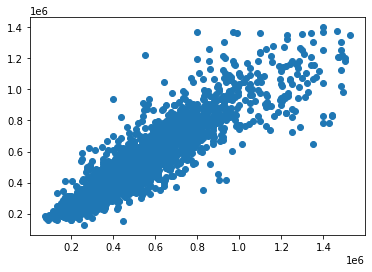

In [78]:
plt.scatter(y_test,tahmindizisi)

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor


In [56]:
mlp_params = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive']}

In [79]:
mlp_model = MLPRegressor().fit(x_train, y_train)

In [58]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 5, n_jobs= 1,verbose=3).fit(x_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(150, 100, 50), learning_rate=constant, max_iter=50, solver=sgd;, score=-0.000 total time=   1.0s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(150, 100, 50), learning_rate=constant, max_iter=50, solver=sgd;, score=-0.000 total time=   2.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(150, 100, 50), learning_rate=constant, max_iter=50, solver=sgd;, score=-0.000 total time=   1.3s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(150, 100, 50), learning_rate=constant, max_iter=50, solver=sgd;, score=-0.000 total time=   1.6s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(150, 100, 50), learning_rate=constant, max_iter=50, solver=sgd;, score=-0.001 total time=   1.5s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(150, 100, 50), learning_rate=constant, max_iter=50, solver=adam;, sco

In [59]:
pd.Series(mlp_cv_model.best_params_)

activation                      relu
alpha                           0.05
hidden_layer_sizes    (150, 100, 50)
learning_rate               adaptive
max_iter                         100
solver                          adam
dtype: object

In [80]:
mlp_tuned = MLPRegressor(
                        alpha = 0.05,
                        hidden_layer_sizes = (150, 100, 50),
                        learning_rate = "adaptive",
                        max_iter = 100,
                        solver = "adam").fit(x_train, y_train)

In [81]:
y_predict = mlp_tuned.predict(x_test)

In [82]:
from sklearn.metrics import mean_squared_error

In [83]:
np.sqrt(mean_squared_error(y_test, y_predict))

133028.95672110879

In [85]:
tahmin = target.inverse_transform(y_predict.reshape(-1,1))
gerçek = target.inverse_transform(y_test.reshape(-1,1))

In [86]:
from sklearn.metrics import mean_absolute_error as mae
  
# calculate MAE
error = mae(y_predict, y_test)
  
# display
print("Mean absolute error : " + str(error))

Mean absolute error : 96367.46842691151


In [88]:
toplam = 0
for x in range (len(y_test)):
    a = abs((y_test[x] - y_predict[x])/y_test[x]) * 100
    toplam += a[0]
    #print(abs(y_test[x] - tahmindizisi[x])/tahmindizisi[x] * 100)
print("Mape: {}".format(toplam/len(y_test)))

Mape: 21.017299516788803


In [89]:
import xgboost

In [91]:
DM_train = xgboost.DMatrix(data = x_train, label = y_train)
DM_test = xgboost.DMatrix(data = x_test, label = y_test)

In [92]:
from xgboost import XGBRegressor;

In [94]:
xgb = XGBRegressor().fit(x_train, y_train)

In [95]:
y_predict = xgb.predict(x_test)

In [96]:
np.sqrt(mean_squared_error(y_test, y_predict))

97724.3764085988

In [97]:
xgb_params = {"colsample_bytree": [0.4, 0.5, 0.6, 0.9, 1],
             "n_estimators": [100, 200, 500, 1000],
             "max_depth": [2, 3, 4, 5, 6],
             "learning_rate": [0.1, 0.01, 0.5]}

In [104]:
xgb = XGBRegressor()
xgb_cv = GridSearchCV(xgb, param_grid =xgb_params, cv = 5, n_jobs=-1, verbose=2).fit(x_train, y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


In [105]:
xgb_cv.best_params_

{'colsample_bytree': 0.6,
 'learning_rate': 0.01,
 'max_depth': 6,
 'n_estimators': 1000}

In [106]:
xgb_tuned = XGBRegressor(colsample_bytree = 0.6,
                        learning_rate = 0.01,
                        max_depth = 6,
                        n_estimators = 1000).fit(x_train, y_train)

In [107]:
y_predict = xgb_tuned.predict(x_test)

In [108]:
np.sqrt(mean_squared_error(y_test, y_predict))

95044.67903977839

In [109]:
toplam = 0
for x in range (len(y_test)):
    a = abs((y_test[x] - y_predict[x])/y_test[x]) * 100
    toplam += a[0]
    #print(abs(y_test[x] - tahmindizisi[x])/tahmindizisi[x] * 100)
print("Mape: {}".format(toplam/len(y_test)))

Mape: 13.562022518916171
